# Production cycles

natural resources (limited by max. production rate):

    * metal
    * water
    * farmland
    
production results:

    * foot
    * 

In [5]:
planet = 'planet'

res_metal = 'raw\nmetal'
res_lithium = 'raw\nlithium'
res_helium = 'raw\nhelium'
res_water = 'water'
res_farmland = 'farm-\nland'

building_administration = 'administration'
building_shipyard = 'shipyard'
building_farm = 'farm'
building_space_command = 'space\ncommand'
building_mine_metal = 'mine\nmetal'
building_mine_lithium = 'mine\nlithium'
building_mine_helium = 'mine\nhelium'
building_helium_reaktor = 'reaktor\nhelium'
building_deuterium_distillery = 'deuterium\ndistillery'
building_all_buildings = 'all\nbuildings'

prod_people = 'people'
prod_food = 'food'
prod_ship = 'ship'
prod_metal = 'metal'
prod_lithium = 'lithium'
prod_helium = 'helium'
prod_deuterium = 'deuterium'

label_produce = 'produce'
label_support = 'support'
label_need = 'need'

def add_buildings_to_graph(f):
    f.attr('node', shape='rectangle', color='black')
    f.node(building_farm)
    f.node(building_administration)
    f.node(building_shipyard)
    f.node(building_space_command)
    f.node(building_mine_metal)
    f.node(building_mine_helium)
    f.node(building_mine_lithium)
    f.node(building_helium_reaktor)
    f.node(building_deuterium_distillery)
    return f

def add_all_buildings_to_graph(f):
    f.attr('node', shape='rectangle', color='black')
    f.node(building_all_buildings)
    return f

def add_prod_to_graph(f):
    f.attr('node', shape='circle', color='blue')
    f.node(prod_food)
    f.node(prod_people)
    f.node(prod_metal)
    f.node(prod_lithium)
    f.node(prod_helium)
    f.node(prod_deuterium)
    return f

def add_res_to_graph(f):
    f.attr('node', shape='doublecircle', color='red')
    f.node(res_metal)
    f.node(res_water)
    f.node(res_farmland)
    f.node(res_helium)
    f.node(res_lithium)
    return f

def add_arrow_to_graph(f):
    f.attr('node', shape='rarrow', color='orange')
    f.node(prod_ship)
    return f

def add_basic_to_graph(f):
    f.attr('node', shape='circle', color='grey')
    f.node(planet)
    return f

## dependency graph

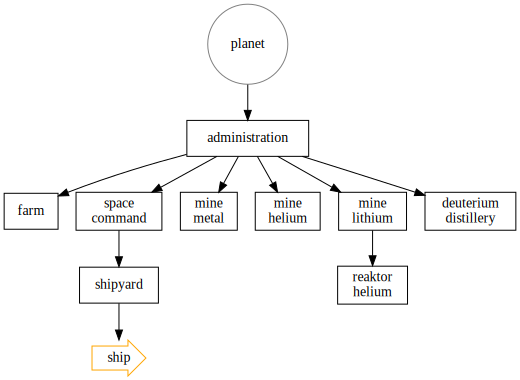

In [2]:
from graphviz import Digraph

f = Digraph('dependency tree', filename='prod_tree.gv')

f = add_basic_to_graph(f)

f = add_buildings_to_graph(f)

f = add_arrow_to_graph(f)

f.edge(planet, building_administration)

f.edge(building_administration, building_farm)
f.edge(building_administration, building_space_command)
f.edge(building_administration, building_mine_metal)
f.edge(building_administration, building_mine_lithium)
f.edge(building_administration, building_mine_helium)
f.edge(building_administration, building_deuterium_distillery)

f.edge(building_mine_lithium, building_helium_reaktor)

f.edge(building_space_command, building_shipyard)

f.edge(building_shipyard, prod_ship)

f

## construction graph:

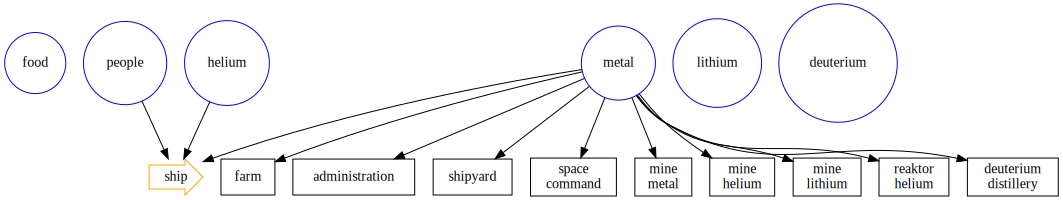

In [9]:
from graphviz import Digraph

f = Digraph('construction tree', filename='prod_tree.gv')

f = add_prod_to_graph(f)

f = add_buildings_to_graph(f)

f = add_arrow_to_graph(f)

# graph
f.edge(prod_metal, building_farm)
f.edge(prod_metal, building_administration)
f.edge(prod_metal, building_shipyard)
f.edge(prod_metal, prod_ship)
f.edge(prod_metal, building_space_command)
f.edge(prod_metal, building_mine_metal)
f.edge(prod_metal, building_helium_reaktor)
f.edge(prod_metal, building_mine_lithium)
f.edge(prod_metal, building_mine_helium)
f.edge(prod_metal, building_deuterium_distillery)

f.edge(prod_helium, prod_ship)

f.edge(prod_people, prod_ship)

f

production graph:

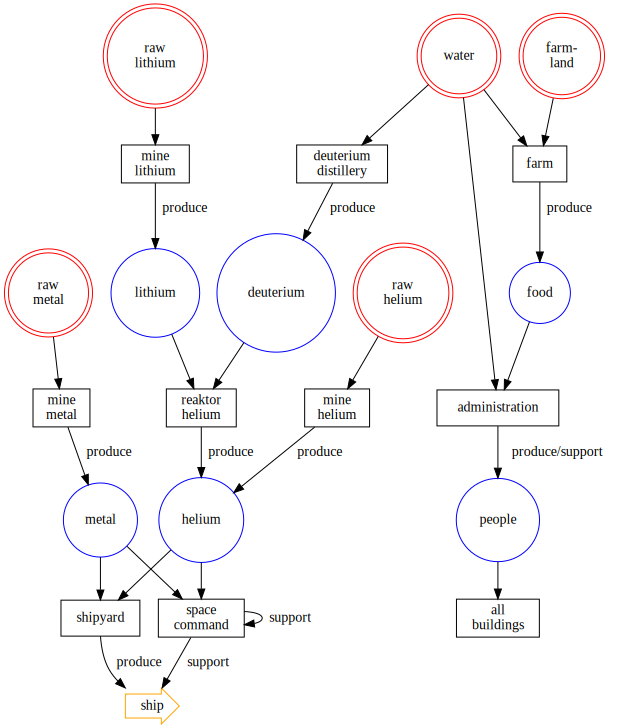

In [8]:
from graphviz import Digraph

f = Digraph('production tree', filename='prod_tree.gv')
#f.attr(rankdir='LR')

f = add_res_to_graph(f)

f = add_prod_to_graph(f)

f = add_buildings_to_graph(f)

f = add_arrow_to_graph(f)

f = add_all_buildings_to_graph(f)

f.edge(res_farmland, building_farm)

f.edge(res_water, building_farm)
f.edge(res_water, building_administration)
f.edge(res_water, building_deuterium_distillery)

f.edge(building_deuterium_distillery, prod_deuterium, label=label_produce)

f.edge(prod_food, building_administration)

f.edge(building_farm, prod_food, label=label_produce)

f.edge(building_administration, prod_people, label=label_produce+'/'+label_support)

f.edge(prod_people, building_all_buildings)

f.edge(res_metal, building_mine_metal)

f.edge(building_mine_metal, prod_metal, label=label_produce)

f.edge(res_helium, building_mine_helium)
f.edge(building_mine_helium, prod_helium, label=label_produce)

f.edge(res_lithium, building_mine_lithium)
f.edge(building_mine_lithium, prod_lithium, label=label_produce)

f.edge(prod_deuterium, building_helium_reaktor)
f.edge(prod_lithium, building_helium_reaktor)
f.edge(building_helium_reaktor, prod_helium, label=label_produce)

f.edge(prod_helium, building_space_command)
f.edge(prod_helium, building_shipyard)

f.edge(prod_metal, building_space_command)
f.edge(prod_metal, building_shipyard)

f.edge(building_shipyard, prod_ship, label=label_produce)

f.edge(building_space_command, prod_ship, label=label_support)
f.edge(building_space_command, building_space_command, label=label_support)

f